# HW2 Q1 + Q2

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import patsy as pts
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
df = pd.read_csv('journal.pone.0234552.s004.csv',index_col=0)

In [31]:
df

,BMI,RFM,AFM,SMM,Waist circumference,Weight_value-1,Height_value-1,Visc,Body height,Head height,...,Volume Hand Right,Volume Thigh Left,Volume Thigh Right,Volume Lower Leg Left,Volume Lower Leg Right,Volume Foot Left,Volume Foot Right,Volume Chest,Volume Belly,Volume Hip
N,,,,,,,,,,,,,,,,,,,,,
1,20.13,5.66,3.89,30.95,0.80,68.60,1.85,0.17,184.0,24.8,...,0.466,5.926,5.739,2.878,2.841,1.264,1.223,17.816,6.020,14.146
2,18.35,9.79,5.30,22.65,0.71,54.10,1.72,0.46,170.8,24.1,...,0.329,5.106,5.066,2.064,2.071,0.947,0.921,13.792,4.477,10.860
3,22.11,9.63,6.31,29.26,0.76,65.55,1.72,0.38,171.5,23.7,...,NaN,5.850,6.040,2.478,2.489,1.075,1.037,22.283,6.479,12.007
4,20.46,11.11,8.03,31.08,0.85,72.25,1.88,0.91,187.6,25.1,...,0.319,6.734,6.809,2.959,2.961,1.028,1.035,20.314,10.700,11.533
5,24.58,24.03,16.10,24.53,0.82,67.00,1.65,1.17,164.1,23.5,...,0.263,6.422,6.383,3.094,3.079,0.990,0.995,18.031,7.530,13.261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,21.73,12.38,8.57,29.82,0.74,69.25,1.78,0.01,178.0,23.7,...,0.328,7.299,7.378,2.937,2.966,1.049,1.026,18.104,6.148,11.833
101,19.90,7.49,4.44,26.33,0.70,59.35,1.73,0.34,172.3,24.8,...,0.311,5.605,5.824,2.603,2.590,1.050,1.025,14.611,5.199,10.883
102,18.24,9.17,5.05,23.50,0.72,55.10,1.74,0.44,174.0,23.6,...,0.355,4.919,5.282,2.178,2.212,1.048,1.022,15.218,5.088,11.208


In [32]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 176 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   BMI                                                104 non-null    float64
 1   RFM                                                104 non-null    float64
 2   AFM                                                104 non-null    float64
 3   SMM                                                104 non-null    float64
 4   Waist circumference                                104 non-null    float64
 5   Weight_value-1                                     104 non-null    float64
 6   Height_value-1                                     104 non-null    float64
 7   Visc                                               104 non-null    float64
 8   Body height                                        104 non-null    float64
 9   Head heig

## Q1

In [50]:
#Build DF of the required columns
data = df[['Visc','BMI','Waist circumference', 'Height_value-1']]
data['WHtR'] = df.loc[:,'Waist circumference']/df.loc[:,'Height_value-1']
data = data.drop(columns=['Height_value-1'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Visc                 104 non-null    float64
 1   BMI                  104 non-null    float64
 2   Waist circumference  104 non-null    float64
 3   WHtR                 104 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


<ipython-input-50-32483e0868bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WHtR'] = df.loc[:,'Waist circumference']/df.loc[:,'Height_value-1']


In [34]:
data

,Visc,BMI,Waist circumference,WHtR
N,,,,
1,0.17,20.13,0.80,0.432432
2,0.46,18.35,0.71,0.412791
3,0.38,22.11,0.76,0.441860
4,0.91,20.46,0.85,0.452128
5,1.17,24.58,0.82,0.496970
...,...,...,...,...
100,0.01,21.73,0.74,0.415730
101,0.34,19.90,0.70,0.404624
102,0.44,18.24,0.72,0.413793


a. Train a Linear Regression model which predicts "Visc" from "BMI", "Waist circumference"
and WHtR ("Waist circumference"/"Height_value-1").

In [64]:
def split_df (target_name: str, data: pd.DataFrame):
    """ 
    Split df into random train and test subsets based on target name column

    Parameters
    ----------
    target_name : str
        target column name
    data : DataFrame
        DataFrame  

    return
    ----------
    X_train, X_test, y_train, y_test
    """
    X = data.drop(columns=[target_name])
    y = data[target_name].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [66]:
target_name = "Visc"
X_train, X_test, y_train, y_test = split_df(target_name, data)
reg = LinearRegression().fit(X_train, y_train)
y_predicted = reg.predict(X_test)

b. Report the root mean squared prediction error (RMSE) on the test set.

In [67]:
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print(f"The root mean squared prediction error (RMSE) on the test set is {rmse}.")

The root mean squared prediction error (RMSE) on the test set is 0.3130062066278463.


c. Report the estimated coefficient's values.

In [68]:
reg.coef_

array([-0.07687255,  9.80077941,  4.51595018])

d. Plot a scatter plot of the predicted target variable v.s. the actual target variable based on
the test set

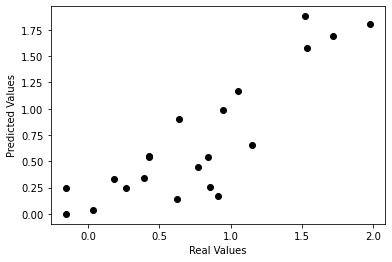

In [69]:
_=plt.scatter(y_predicted, y_test, color="black")
_=plt.xlabel("Real Values")
_=plt.ylabel("Predicted Values")

## Q2

a. Train a Linear Regression model which predicts "Visc" from "BMI", "Waist circumference" and WHtR ("Waist circumference"/"Height_value-1").

In [82]:
data2 = data.drop(columns=[target_name])
columns = data2.columns
y = data[target_name].copy()
i=0
for col in columns:
    if i==0:
        join = pd.concat([y,pd.get_dummies(pd.qcut(data2[col],4), drop_first=True)],axis=1)
    else:
        join = pd.concat([join,pd.get_dummies(pd.qcut(data2[col],4), drop_first=True)],axis=1)
    i=i+1
X_train, X_test, y_train, y_test = split_df(target_name, join)
reg = LinearRegression().fit(X_train, y_train)
y_predicted = reg.predict(X_test)

b. Report the root mean squared prediction error (RMSE) on the test set.

In [83]:
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print(f"The root mean squared prediction error (RMSE) on the test set is {rmse}.")

The root mean squared prediction error (RMSE) on the test set is 0.3258963130976616.


c. Report the estimated coefficient's values.

In [84]:
reg.coef_

array([-0.17614824, -0.19818875,  0.0110404 ,  0.0093602 ,  0.26553151,
        1.25505678,  0.08030516,  0.25181125,  0.64453197])

d. Plot a scatter plot of the predicted target variable v.s. the actual target variable based on the test set

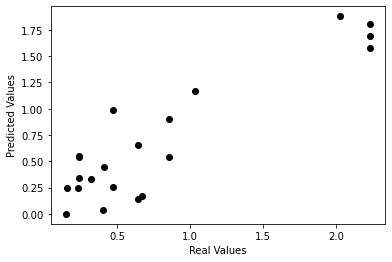

In [85]:
_=plt.scatter(y_predicted, y_test, color="black")
_=plt.xlabel("Real Values")
_=plt.ylabel("Predicted Values")

In [79]:
join

,Visc,"(20.798, 22.42]","(22.42, 24.735]","(24.735, 37.46]","(0.74, 0.79]","(0.79, 0.85]","(0.85, 1.16]","(0.415, 0.441]","(0.441, 0.482]","(0.482, 0.624]"
N,,,,,,,,,,
1,0.17,0,0,0,0,1,0,1,0,0
2,0.46,0,0,0,0,0,0,0,0,0
3,0.38,1,0,0,1,0,0,0,1,0
4,0.91,0,0,0,0,1,0,0,1,0
5,1.17,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
100,0.01,1,0,0,0,0,0,1,0,0
101,0.34,0,0,0,0,0,0,0,0,0
102,0.44,0,0,0,0,0,0,0,0,0
